# Question 1

## a

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("/Users/kychen/Downloads/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [16]:
#Check missing value
df.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
avg_item_value    0
dtype: int64

In [17]:
#Check duplcate rows
dup = df[df.duplicated()]
dup

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,avg_item_value


There is no missing value or duplicated rows in the dataset.

In [8]:
df.shape

(5000, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [10]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [21]:
#Define a new feature named avg_item_value
df['avg_item_value'] = df['order_amount'] * 1. / df['total_items']
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,avg_item_value
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        5000 non-null   int64  
 1   shop_id         5000 non-null   int64  
 2   user_id         5000 non-null   int64  
 3   order_amount    5000 non-null   int64  
 4   total_items     5000 non-null   int64  
 5   payment_method  5000 non-null   object 
 6   created_at      5000 non-null   object 
 7   avg_item_value  5000 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 312.6+ KB


In [87]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items,avg_item_value
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,25725.000000


<AxesSubplot:xlabel='shop_id'>

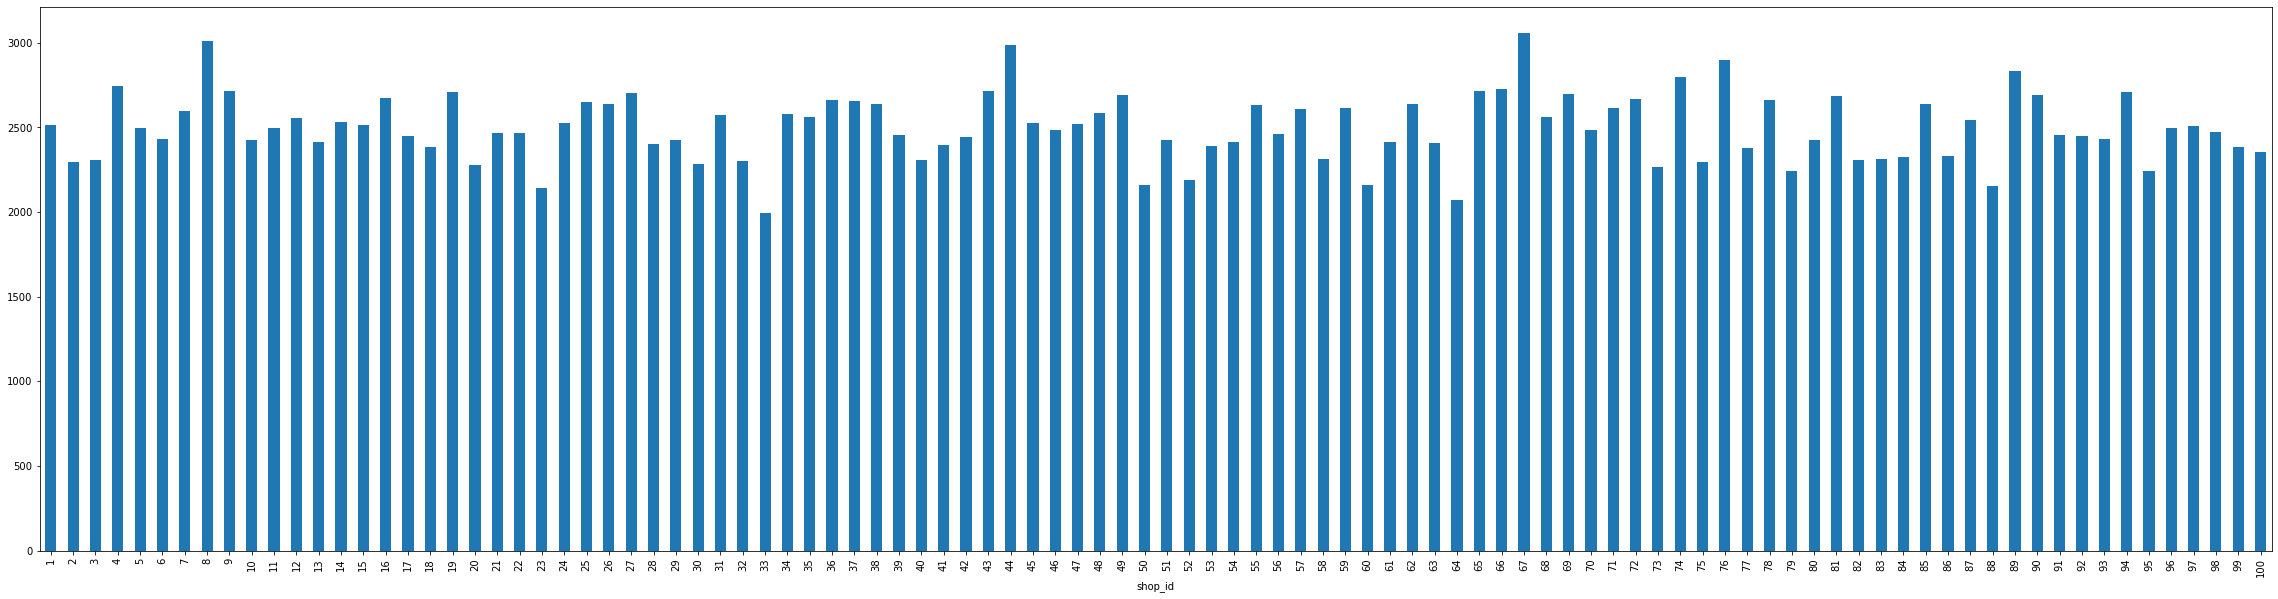

In [34]:
df_groupshop = df.groupby('shop_id')['order_id'].mean()
df_groupshop.plot.bar(figsize=(40,10))

The visualization of shop_id with order shows an approximate normal distribution.

In [85]:
usergroup=pd.DataFrame({'mean_value_of_order_amount_by_user_id': df.groupby('user_id')['order_amount'].mean()}).reset_index()
usergroup.head()

,user_id,mean_value_of_order_amount_by_user_id
0,607,704000.000000
1,700,299.375000
2,701,397.076923
3,702,406.615385
4,703,380.687500


<AxesSubplot:xlabel='user_id', ylabel='mean_value_of_order_amount_by_user_id'>

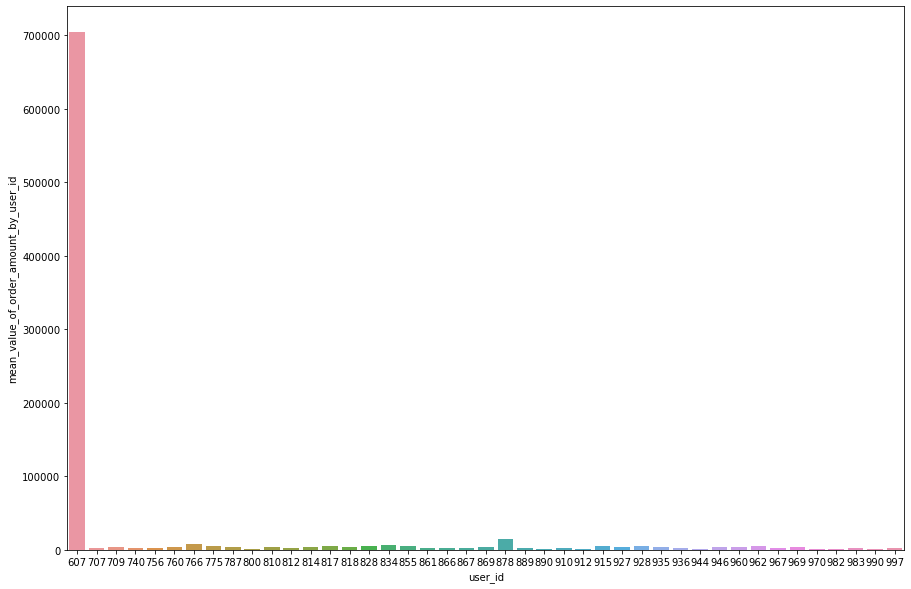

In [55]:
subset_order_by_userID = usergroup[usergroup['mean_value_of_order_amount_by_user_id']>1500]
fig = plt.figure(figsize=(15,10))
sns.barplot(x=subset_order_by_userID['user_id'],y=subset_order_by_userID['mean_value_of_order_amount_by_user_id'])

From the dataframe and visualization above,user 607 has suspicious behavior. User 607 pay 704,000 dollars with 2000 items each trade ,which is a extreme outlier.

In [88]:
#Check the record of user 607
df[df['user_id']==607]


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,avg_item_value
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0


Here are the consutomer record of User 607.This user purchases from the same shop and same time with different dates.All of the purchase takes place at 4 AM. Additionally, User 607 purchases 2000 items every time. Each order worths 704,000 dollars. 

From all the informtion above, we may conclude that User 607 had fraud behaviors and the purchase might be conducted by computer programming script, instead of human being.

Besides User 607, user 878 and 766 also had relatively large number of order amount among all users. Here we will do some EDA for user 878 and 766.

In [89]:
df[df['user_id']==878]


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,avg_item_value
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0
818,819,60,878,354,2,debit,2017-03-27 12:42:01,177.0
927,928,2,878,94,1,credit_card,2017-03-10 18:09:05,94.0
1575,1576,47,878,290,2,cash,2017-03-07 22:06:51,145.0
1833,1834,74,878,153,1,credit_card,2017-03-06 17:33:21,153.0
2011,2012,87,878,298,2,cash,2017-03-04 14:14:35,149.0
3474,3475,20,878,254,2,cash,2017-03-17 3:43:03,127.0
3647,3648,98,878,266,2,cash,2017-03-06 1:49:57,133.0
4106,4107,26,878,176,1,debit,2017-03-20 4:32:18,176.0
4215,4216,80,878,435,3,debit,2017-03-05 3:07:32,145.0


In [58]:
df[df['user_id']==766]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,avg_item_value
1132,1133,81,766,354,2,cash,2017-03-07 15:43:40,177.0
1278,1279,70,766,346,2,credit_card,2017-03-15 20:05:22,173.0
1464,1465,4,766,128,1,debit,2017-03-22 23:36:53,128.0
1691,1692,84,766,459,3,debit,2017-03-09 1:39:10,153.0
2115,2116,63,766,544,4,debit,2017-03-14 17:28:31,136.0
2169,2170,4,766,256,2,debit,2017-03-20 23:10:22,128.0
2936,2937,69,766,262,2,cash,2017-03-17 22:22:59,131.0
3422,3423,20,766,381,3,cash,2017-03-30 17:36:08,127.0
3724,3725,78,766,77175,3,credit_card,2017-03-16 14:13:26,25725.0
3977,3978,55,766,171,1,debit,2017-03-10 9:54:00,171.0


In the row of order_id 692 and 1133, user 766 and 878 shows abnormal one-time purchase in the same shop(shop 78). It is almost impossible for a sneak store to own such expensive product.(with avg value of 25,725 dollars)

In [63]:
usergroup2=pd.DataFrame({'mean_value_of_order_amount_by_shop_id': df.groupby('shop_id')['order_amount'].mean()}).reset_index()
usergroup2

,shop_id,mean_value_of_order_amount_by_shop_id
0,1,308.818182
1,2,174.327273
2,3,305.250000
3,4,258.509804
4,5,290.311111
...,...,...
95,96,330.000000
96,97,324.000000
97,98,245.362069
98,99,339.444444


<AxesSubplot:xlabel='shop_id', ylabel='mean_value_of_order_amount_by_shop_id'>

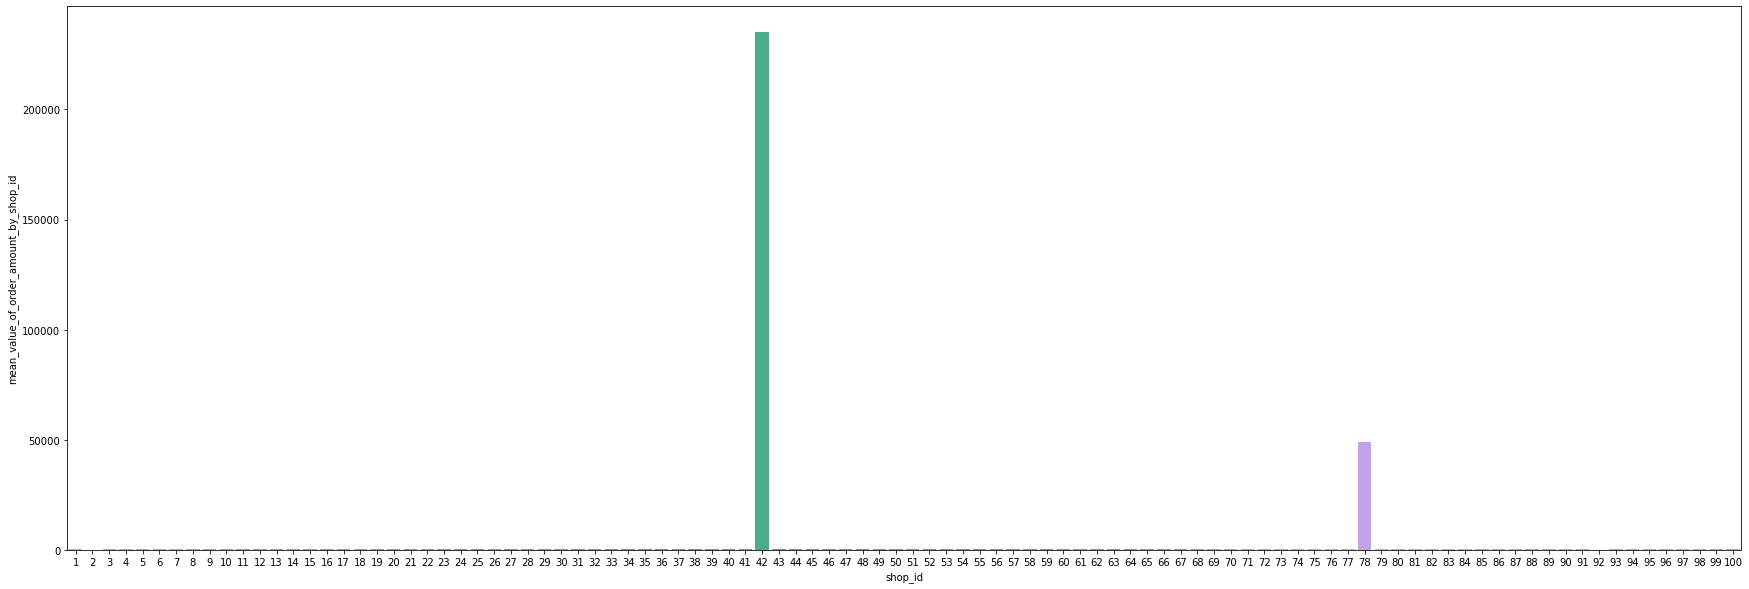

In [67]:
fig = plt.figure(figsize=(30,10))
sns.barplot(x=usergroup2['shop_id'],y=usergroup2['mean_value_of_order_amount_by_shop_id'])

From the visualization above, shop 42 and shop 78 shows the abnormal order amount values. We will check the purchase record of shop 42 and shop 78

In [91]:
#Check the record of shop 42
df[df['shop_id']==42]

df_shopid_42=df[df['shop_id']==42]
df_shopid_42.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,avg_item_value
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39,352.0
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58,352.0


In [92]:
#Check the record of shop 78
df[df['shop_id']==78]
df_shopid_78=df[df['shop_id']==78]
df_shopid_78.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,avg_item_value
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0


For shop 78, the fraud behavior shows by the extreme high value of average item price. The price is abnormal for products in a sneaker store.

For shop 42, the fraud behavior shows by the extreme high in total numbers and order amount in some of the orders. by checking the time in the row, all of the abnormal consuming behaviors are conducted by the computer programming script, because of the same set-up time (4 am in the morning) and credit card payment.

In [ ]:
#Clean the data by removing outliers(user)

In [93]:
#remove user 607, user 766, user 878, shop 78,shop 42


new_df = df[df['user_id']!=607]
new_df = df[df['user_id']!=766]
new_df = df[df['user_id']!=878]


new_df = new_df[new_df['shop_id']!=78]
new_df=new_df[new_df['shop_id']!=42]
new_df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,avg_item_value
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0


In [74]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items,avg_item_value
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,25725.000000


In [73]:
new_df.describe()

,order_id,shop_id,user_id,order_amount,total_items,avg_item_value
count,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000
mean,2499.116493,49.881872,849.801349,300.240752,1.996117,150.414878
std,1444.328268,29.144331,86.967382,156.031481,0.983191,23.850875
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1246.000000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2499.000000,50.000000,849.000000,284.000000,2.000000,153.000000
75%,3750.000000,74.000000,925.000000,387.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1086.000000,8.000000,201.000000


On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
What metric would you report for this dataset?
What is its value?


In [12]:
wrong_aov = round(sum(df["order_amount"]) / len(df), 2)
print(wrong_aov)

3145.13


The reason why the average order value (AOV) is $3145.13 is that we divide the "sum of order amount" with the "number of orders". In fact, the customer may have purchased more than one item in a single order, thus causing the value of AOV to be wrong.

The mean value of order amount is 3145.13,which is extremely too high for sneaker stores.

There are outliers in order_amount variable. Additionally, we may also need to consider about how this anamoly consuming behavior take place and investigate whether some users or stores are associated with fraud or abuse. 

The median is 284,which is reasonable.

By the code and visualization that showed above, we detect fraud and abuse behaviors for some users and shops.

User 607 has suspicious behavior. User 607 pay 704,000 dollars with 2000 items each trade,which is a extreme outlier. The purchase might be conducted by computer programming script instead of human being because every purchase shows in the same time(4 AM in the morning).

User 766 and 878 shows abnormal one-time purchase in the same shop(shop 78). It is almost impossible for a sneak store to own such expensive product.(with avg value of 25,725 dollars)

For shop 78, the fraud behavior shows by the extreme high value of average item price. The price is abnormal for products in a sneaker store.

For shop 42, the fraud behavior shows by the extreme high in total numbers and order amount in some of the orders. by checking the time in the row, all of the abnormal consuming behaviors are conducted by the computer programming script, because of the same set-up time (4 AM in the morning) and credit card payment.




After removing outliers, the new mean order amount is 300.24 dollars, which makes more sense rather than 3145.13.

Before removing outliers, median is better than mean in this case because the dataset contains abnormally extreme value. Mean value cannot decribe the sampling distribution of consumption level. After removing outliers, both of them might work well.

## b  & c

For this dataset, I would report the average item value  (avg_item_value) for each store.

Using this index, we can estimate the average price of goods in each store, so as to better understand the distribution of consumption level in these stores.

In [76]:
new_df.describe()

,order_id,shop_id,user_id,order_amount,total_items,avg_item_value
count,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000
mean,2499.116493,49.881872,849.801349,300.240752,1.996117,150.414878
std,1444.328268,29.144331,86.967382,156.031481,0.983191,23.850875
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1246.000000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2499.000000,50.000000,849.000000,284.000000,2.000000,153.000000
75%,3750.000000,74.000000,925.000000,387.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1086.000000,8.000000,201.000000


/Users/kychen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_item_value', ylabel='Density'>

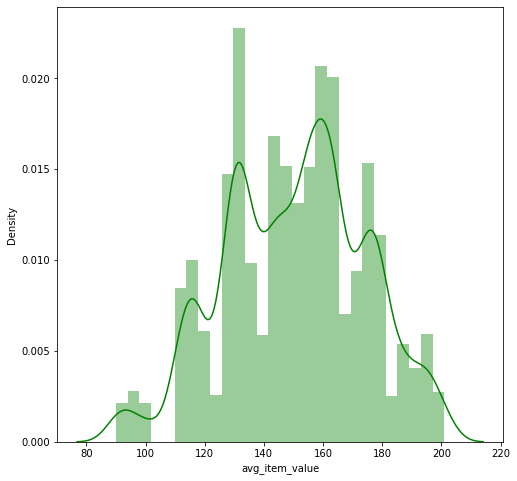

In [78]:
fig = plt.figure(figsize=(8, 8))
sns.distplot(new_df['avg_item_value'], color='green', kde=True)

In [80]:
new_df2 = new_df.drop(new_df[new_df['avg_item_value'] > 357.92].index)

In [81]:
new_df2.describe()

,order_id,shop_id,user_id,order_amount,total_items,avg_item_value
count,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000
mean,2499.116493,49.881872,849.801349,300.240752,1.996117,150.414878
std,1444.328268,29.144331,86.967382,156.031481,0.983191,23.850875
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1246.000000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2499.000000,50.000000,849.000000,284.000000,2.000000,153.000000
75%,3750.000000,74.000000,925.000000,387.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1086.000000,8.000000,201.000000


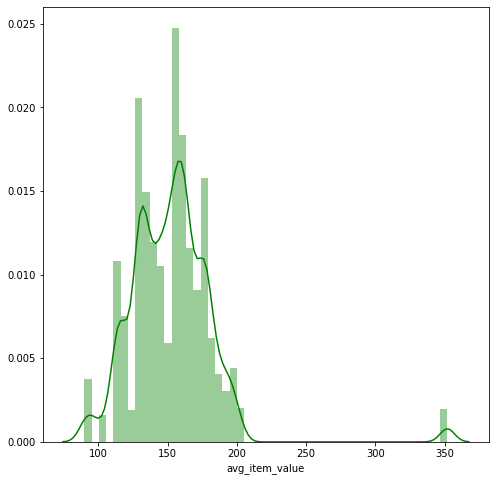

In [94]:
fig = plt.figure(figsize=(8, 8))
sns.distplot(new_df2['avg_item_value'], color='green', kde=True)

In [82]:
new_df2 = new_df2.drop(new_df2[new_df2['avg_item_value'] > 240].index)

In [83]:
new_df2.describe()

,order_id,shop_id,user_id,order_amount,total_items,avg_item_value
count,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000
mean,2499.116493,49.881872,849.801349,300.240752,1.996117,150.414878
std,1444.328268,29.144331,86.967382,156.031481,0.983191,23.850875
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1246.000000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2499.000000,50.000000,849.000000,284.000000,2.000000,153.000000
75%,3750.000000,74.000000,925.000000,387.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1086.000000,8.000000,201.000000


/Users/kychen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_item_value', ylabel='Density'>

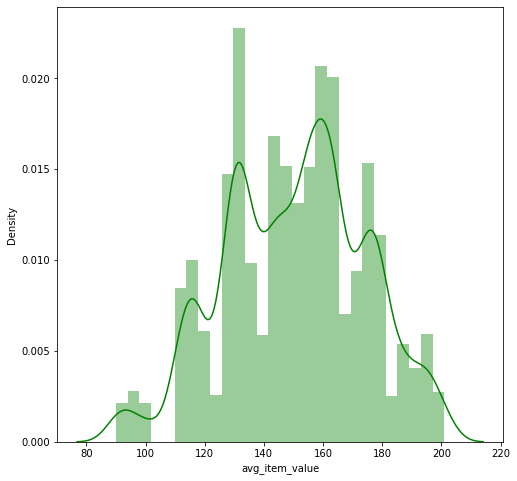

In [84]:
fig = plt.figure(figsize=(8, 8))
sns.distplot(new_df2['avg_item_value'], color='green', kde=True)

# Question 2

How many orders were shipped by Speedy Express in total?
What is the last name of the employee with the most orders?
What product was ordered the most by customers in Germany?


## a

## b

## c